In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import random
from estimate_bass import *

In [17]:
u = "/home/yu/PycharmProjects/A-fast-method/auto_data/"

## 1. 补充全连通图扩散

In [3]:
def diffuse(p, q, m=10000, num_runs=35):  # 全联通扩散模拟
    num_of_adopt = []
    for j in range(num_runs):
        dose = sum(num_of_adopt)  # 邻居数量
        prob = p + q * dose
        x = sum([ 1 for i in range(m - sum(num_of_adopt)) if random.random() <= prob ])
        num_of_adopt.append(x)
    return num_of_adopt

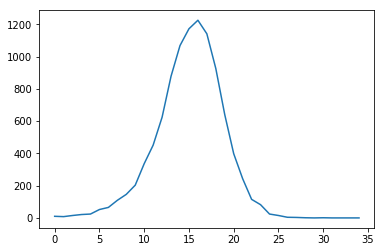

In [26]:
x = diffuse(0.0007, 5e-5)
plt.plot(x)

In [10]:
class Gen_para:
    def __init__(self, p_cont=(0.001, 0.035), q_cont=(3.5e-5, 5.5e-5), delta=(0.001, 5e-6)):
        self.p_cont = p_cont
        self.q_cont = q_cont
        self.d_p, self.d_q = delta

    def add_data(self, p, q):
        diff = [diffuse(p, q) for i in range(10)]
        x = np.mean(diff, axis=0)
        max_idx = np.argmax(x)
        s = x[: (max_idx + 2)]
        para_range = [[1e-6, 0.08], [0.01, 1], [2000, 20000]]
        bassest = Bass_Estimate(s, para_range)
        bassest.t_n = 1000
        res = bassest.optima_search(c_n=200, threshold=10e-8)
        return res[:2]

    def identify_range(self):
        min_p, max_p = self.p_cont
        min_q, max_q = self.q_cont
        est_cont = [self.add_data(p, q) for p, q in [(min_p, min_q), (max_p, max_q)]]
        i = 1
        while True:
            min_P, min_Q = est_cont[0]
            max_P, max_Q = est_cont[1]
            print(i, ' P:%.4f~%.4f' % (min_P, max_P), ' Q:%.4f~%.4f' % (min_Q, max_Q))
            c1, c2 = 0, 0
            if min_P > 0.0007:  # in case of min_p < 0
                if min_p - self.d_p > 0:
                    min_p -= self.d_p
                else:
                    min_p *= 0.8
                c1 += 1
            if min_Q > 0.38:
                min_q -= self.d_q
                c1 += 1
            if max_P < 0.03:
                max_p += self.d_p
                c2 += 1
            if max_Q < 0.53:
                max_q += self.d_q
                c2 += 1

            i += 1

            if c1 + c2 != 0:  # check which ends should be updated
                if c1 != 0:
                    est_cont[0] = self.add_data(min_p, min_q)
                if c2 != 0:
                    est_cont[1] = self.add_data(max_p, max_q)
            else:
                break

            if i == 25:
                break

        return [(min_p, max_p), (min_q, max_q)], [(min_P, max_P), (min_Q, max_Q)]

In [11]:
ger_samp = Gen_para()
bound = ger_samp.identify_range()

Exceed the maximal iteration: 100
1  P:0.0007~0.0221  Q:0.3161~0.4960
2  P:0.0007~0.0232  Q:0.3161~0.5309
3  P:0.0007~0.0230  Q:0.3161~0.5331
4  P:0.0007~0.0242  Q:0.3161~0.5242
5  P:0.0007~0.0236  Q:0.3161~0.5847
6  P:0.0007~0.0244  Q:0.3161~0.5831
7  P:0.0007~0.0252  Q:0.3161~0.5799
8  P:0.0007~0.0260  Q:0.3161~0.5983
9  P:0.0007~0.0263  Q:0.3161~0.5898
10  P:0.0007~0.0270  Q:0.3161~0.5992
11  P:0.0007~0.0269  Q:0.3161~0.6015
12  P:0.0007~0.0283  Q:0.3161~0.5565
13  P:0.0007~0.0286  Q:0.3161~0.5590
14  P:0.0007~0.0301  Q:0.3161~0.5698


In [13]:
r_p, r_q = bound[0]
pq_range = [(p, q) for p in np.linspace(r_p[0], r_p[1], num=10) for q in np.linspace(r_q[0], r_q[1], num=15)]

In [15]:
r_p, r_q

((0.001, 0.048000000000000015), (3.5e-05, 6.500000000000001e-05))

In [16]:
result = []
for p, q in pq_range:
    t1 = time.clock()
    diff_cont = []
    for i in range(10):
        diff = diffuse(p, q, m=10000, num_runs=35)
        diff_cont.append(diff)
    
    mean_diff = np.mean(diff_cont, axis=0)
    result.append(np.concatenate(([p, q], mean_diff)))
    print('p:%.3e, q:%3.e' % (p, q))

np.save('complete_graph(10000)', result)

p:1.000e-03, q:3e-05
p:1.000e-03, q:4e-05
p:1.000e-03, q:4e-05
p:1.000e-03, q:4e-05
p:1.000e-03, q:4e-05
p:1.000e-03, q:5e-05
p:1.000e-03, q:5e-05
p:1.000e-03, q:5e-05
p:1.000e-03, q:5e-05
p:1.000e-03, q:5e-05
p:1.000e-03, q:6e-05
p:1.000e-03, q:6e-05
p:1.000e-03, q:6e-05
p:1.000e-03, q:6e-05
p:1.000e-03, q:7e-05
p:6.222e-03, q:3e-05
p:6.222e-03, q:4e-05
p:6.222e-03, q:4e-05
p:6.222e-03, q:4e-05
p:6.222e-03, q:4e-05
p:6.222e-03, q:5e-05
p:6.222e-03, q:5e-05
p:6.222e-03, q:5e-05
p:6.222e-03, q:5e-05
p:6.222e-03, q:5e-05
p:6.222e-03, q:6e-05
p:6.222e-03, q:6e-05
p:6.222e-03, q:6e-05
p:6.222e-03, q:6e-05
p:6.222e-03, q:7e-05
p:1.144e-02, q:3e-05
p:1.144e-02, q:4e-05
p:1.144e-02, q:4e-05
p:1.144e-02, q:4e-05
p:1.144e-02, q:4e-05
p:1.144e-02, q:5e-05
p:1.144e-02, q:5e-05
p:1.144e-02, q:5e-05
p:1.144e-02, q:5e-05
p:1.144e-02, q:5e-05
p:1.144e-02, q:6e-05
p:1.144e-02, q:6e-05
p:1.144e-02, q:6e-05
p:1.144e-02, q:6e-05
p:1.144e-02, q:7e-05
p:1.667e-02, q:3e-05
p:1.667e-02, q:4e-05
p:1.667e-02, 

In [22]:
data = np.load('complete_graph(10000).npy')

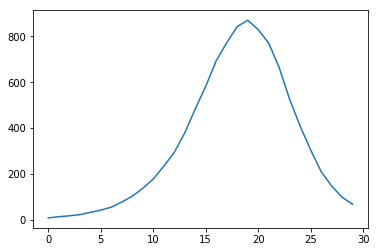

In [29]:
plt.plot(data[7][2:])

### 数据分析

In [18]:
import statsmodels.formula.api as smf
import pandas as pd

In [19]:
est_data = np.load(u+'estimate_complete_graph(10000).npy')

#### (1) M and $r^2$

In [25]:
m_r2 = tuple(zip(np.mean(est_data[:, [4, 5]], axis=0),  np.std(est_data[:, [4, 5]], axis=0)))
print('m| mean:%.1f, std:%.1f' % m_r2[0])
print('r2| mean:%.4f, std:%.4f' % m_r2[1])

m| mean:11334.0, std:283.7
r2| mean:0.9988, std:0.0011


#### (2) p and P, q and Q

In [26]:
pd_est = pd.DataFrame(est_data, columns=['p', 'q', 'P', 'Q', 'M', 'R2'])

In [27]:
pd_est.head()

,p,q,P,Q,M,R2
0,0.001,0.000035,0.000617,0.312971,11119.508161,0.999824
1,0.001,0.000037,0.000633,0.333698,10964.226933,0.999579
2,0.001,0.000039,0.000623,0.349680,10938.580979,0.999423
3,0.001,0.000041,0.000611,0.364556,11160.815614,0.999726
4,0.001,0.000044,0.000631,0.373888,11579.265991,0.999472


In [31]:
results1 = smf.ols('p ~ P-1', data=pd_est).fit()
a = results1.params['P']
r2 = results1.rsquared
print(a, r2)

1.45457552116 0.994124937522


In [32]:
results2 = smf.ols('q ~ Q - 1', data=pd_est).fit()
a = results2.params['Q']
r2 = results2.rsquared
print(a, r2)

0.000112234046286 0.998749206007


In [ ]:
#### (2) Distn

$p=k_1\cdot P$

$q=k_2\cdot Q$

$D(\mathrm{fit, predict}) = \sqrt{(\hat p - p)^2 + (\hat q - q)^2}$

$\mathrm{Indicator} = \frac{\mathrm{D_{test} - D_{train}}}{\mathrm{D_{train}}}$

In [33]:
def calcu_distance(data, num_train=50):
    '''
    data: [[p, q, P, Q, M, r2]]
    '''
    df = pd.DataFrame(data, columns=['p', 'q', 'P', 'Q', 'M', 'r2'])
    
    # 随机生成训练集和测试集
    num_tol = len(data)
    idx_cont = np.arange(num_tol)
    idx_train = np.random.choice(idx_cont, size=num_train, replace=False)  # for the training set
    idx_test = np.array([i for i in idx_cont if i not in idx_train])  # the remaining is the test set
    train_set = df.loc[idx_train, ['p', 'q', 'P', 'Q']]
    test_set = df.loc[idx_test, ['p', 'q', 'P', 'Q']]
    
    # 预测 p
    result_p = smf.ols('p ~ P-1', data=train_set).fit()
    k_p = result_p.params['P']
    r2_p = result_p.rsquared
    train_set['pred_p'] = k_p * train_set['P']
    test_set['pred_p'] = k_p * test_set['P']
    
    # 预测 q
    result_q = smf.ols('q ~ Q-1', data=train_set).fit()
    k_q = result_q.params['Q']
    r2_q = result_q.rsquared
    train_set['pred_q'] = k_q * train_set['Q']
    test_set['pred_q'] = k_q * test_set['Q']
    
    # 测试集中预测点和实际点之前的距离
    dis_train = np.sqrt((train_set['p'] - train_set['pred_p']) ** 2 
                                      + (train_set['q'] - train_set['pred_q']) ** 2)
    
    dis_test = np.sqrt((test_set['p'] - test_set['pred_p']) ** 2 
                                      + (test_set['q'] - test_set['pred_q']) ** 2)
    
    return dis_train, dis_test

In [35]:
res_cont = []
for j in range(100):
    dis_train, dis_test = calcu_distance(est_data, num_train=9)      
    res_cont.append([(np.mean(dis_train), np.std(dis_train)),
                     (np.mean(dis_test), np.std(dis_test))])

In [36]:
mean_train = res_cont[:][0][0]
std_train = res_cont[:][0][1]

mean_test = res_cont[:][1][0]
std_test = res_cont[:][1][1]

print('  Train: %.5f (%.6f)' % (np.mean(mean_train), np.std(mean_train)), end='\t')
print('  Test: %.5f (%.6f)' % (np.mean(mean_test), np.std(mean_test)))

  Train: 0.00150 (0.000035)	  Test: 0.00171 (0.000565)


## 2. 补充预测

### 2.1 度分布异质性

In [39]:
u = "C:\\Users\\XIAOYU\\Desktop\\data\\"
coeff_cont_gnm = np.load(u + "2 degree heterogenous\\estimate gnm_random_graph(10000,30000).npy")
coeff_cont_ba =  np.load(u + "2 degree heterogenous\\estimate barabasi_albert_graph(10000,3).npy")
coeff_cont_exp = np.load(u + "2 degree heterogenous\\estimate exponential_graph(10000,3).npy")
coeff_cont_gua = np.load(u + "2 degree heterogenous\\estimate gaussian_graph(10000,3).npy")
coeff_cont_log = np.load(u + "2 degree heterogenous\\estimate lognormal_graph(10000,3).npy")
coeff_cont_ws0 =  np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0).npy")
coeff_cont_ws01 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.1).npy")
coeff_cont_ws03 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.3).npy")
coeff_cont_ws05 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.5).npy")
coeff_cont_ws07 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.7).npy")
coeff_cont_ws09 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.9).npy")
coeff_cont_ws10 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,1).npy")

In [60]:
d_cont = [coeff_cont_gnm, coeff_cont_ba, coeff_cont_exp, coeff_cont_gua,
                   coeff_cont_log, coeff_cont_ws0, coeff_cont_ws01, coeff_cont_ws03,
                   coeff_cont_ws05, coeff_cont_ws07, coeff_cont_ws09, coeff_cont_ws10]

In [61]:
for i, dataset in enumerate(d_cont):
    d_cont[i] = np.array([np.concatenate((x[0], x[1], x[2:])) for x in dataset], dtype=np.float)

In [62]:
d_cont[0][0]

array([  1.00000000e-03,   5.00000000e-02,   1.37543173e-03,
         2.52742348e-01,   8.91400000e+03,   9.99713576e-01,
         1.24048175e+01])

In [ ]:
def 

## 3. 为什么使用10次重复

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import networkx as nx
import time
import random


class Diffuse:  # 默认网络结构为节点数量为10000，边为30000的随机网络
    def __init__(self, p, q, g=nx.gnm_random_graph(10000, 30000), num_runs=30):
        if not nx.is_directed(g):
            self.g = g.to_directed()
        self.p, self.q = p, q
        self.num_runs = num_runs

    def decision(self, i):  # 线性决策规则
        dose = sum([self.g.node[k]['state'] for k in self.g.predecessors(i)])
        prob = self.p + self.q * dose
        return True if random.random() <= prob else False

    def single_diffuse(self):  # 单次扩散
        for i in self.g:
            self.g.node[i]['state'] = False

        non_adopt_set = [i for i in self.g if not self.g.node[i]['state']]
        num_of_adopt = []
        for j in range(self.num_runs):
            x = 0
            random.shuffle(non_adopt_set)
            for i in non_adopt_set:
                if self.decision(i):
                    self.g.node[i]['state'] = True
                    non_adopt_set.remove(i)
                    x += 1
            num_of_adopt.append(x)
        return num_of_adopt

    def repete_diffuse(self, repetes=10):  # 多次扩散
        return [self.single_diffuse() for i in range(repetes)]

In [3]:
diffuse = Diffuse(p=0.001, q=0.08, num_runs=40)

In [4]:
t1 = time.clock()
diff_cont = diffuse.repete_diffuse(repetes=40)
print('Time: %.2f s' % (time.clock() - t1))

Time: 110.78 s


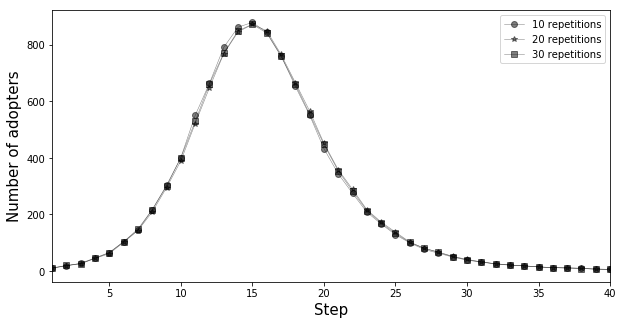

In [24]:
import matplotlib.pyplot as pl

fig = pl.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Step', fontsize=15)
ax.set_ylabel('Number of adopters', fontsize=15)
ax.set_xlim([1, 40])
ax.plot(np.arange(1, 41), np.mean(diff_cont[:10], axis=0),'ko-', lw=0.5, alpha=0.5, label='10 repetitions')
ax.plot(np.arange(1, 41), np.mean(diff_cont[:20], axis=0),'k*-', lw=0.5, alpha=0.5, label='20 repetitions')
ax.plot(np.arange(1, 41), np.mean(diff_cont[:30], axis=0),'ks-', lw=0.5, alpha=0.5, label='30 repetitions')
ax.legend(loc=1)